## Example of how to download a vector area using the OSMDownloader class


#### Download Vector OSM Area giving a bounding box and convert to raster

BoundingBox(7.55166218588036, 44.935118793837205, 7.8219324561506305, 45.20538906410748)
Authenticated using refresh token.


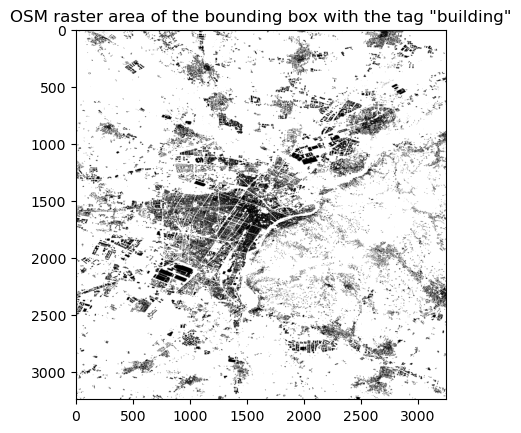

In [2]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
from data.downloader.OSMDownloader import OSMDownloader
from data.utils.LandUtils import LandUtils

query = "Piazza Castello, Torino"
shapefile = "../../tiling_schema/WGS84_tile_schema.shp"

copernicus_downloader = CopernicusDownloader(
    client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
    client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
    token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
)

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

copernicus_area = copernicus_downloader.download_raster_area(
    bounding_box,
    use_oidc=False
)
osm_area = OSMDownloader()
# get the vector area of the bounding box with the tag "building"
osm_area_building = osm_area.get_vector_area(
        bounding_box=bounding_box,
        tags={"building": True}
    )
# convert the vector area to a raster area
detail_adjuster = LandUtils()
raster_osm = detail_adjuster.vector_to_raster(osm_area_building, copernicus_area)
raster_osm_data = raster_osm["data"]

# Plot the raster data
import matplotlib.pyplot as plt

plt.imshow(raster_osm_data, cmap='gray_r')
plt.title('OSM raster area of the bounding box with the tag "building"')
plt.show()

#### Download Vector OSM Area giving a bounding box with the network type and convert to raster

BoundingBox(7.551698922988004, 44.935719873587324, 7.8219691932582744, 45.2059901438576)
Authenticated using refresh token.


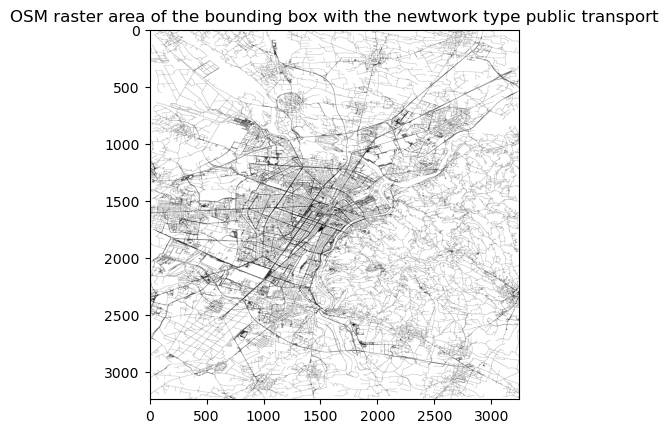

In [2]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
from data.downloader.OSMDownloader import OSMDownloader
from data.utils.LandUtils import LandUtils

query = "Piazza Castello, Torino"
shapefile = "../../tiling_schema/WGS84_tile_schema.shp"

copernicus_downloader = CopernicusDownloader(
    client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
    client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
    token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
)

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

copernicus_area = copernicus_downloader.download_raster_area(
    bounding_box,
    use_oidc=False
)
osm_area = OSMDownloader()
# get the vector area of the bounding box with all the network for the public transport
osm_area_traffic = osm_area.get_traffic_area(
        bounding_box=bounding_box,
        network_type="all_public"
    )

land_utils = LandUtils()
osm_area_traffic_raster = land_utils.vector_to_raster(osm_area_traffic, copernicus_area) # convert the vector area to a raster area
osm_area_traffic_data = osm_area_traffic_raster["data"]

# Plot the raster data
import matplotlib.pyplot as plt

plt.imshow(osm_area_traffic_data, cmap='gray_r')
plt.title('OSM raster area of the bounding box with the newtwork type public transport')
plt.show()